In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy.abc import x, y

In [3]:
# electric potential of a point charge
def phi(x, y):
    return 1 / sp.sqrt(x**2 + y**2)

In [53]:
# total potential
phi_tot = phi(x - 1/3, y) - phi(x + 1/3, y)

# electric field projections
E_x = -phi_tot.diff(x)
E_y = -phi_tot.diff(y)

In [49]:
# convert symbolic expressions to functions
E_x = sp.lambdify((x, y), E_x)
E_y = sp.lambdify((x, y), E_y)
phi_tot = sp.lambdify((x, y), phi_tot)

In [50]:
X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

In [51]:
U = E_x(X, Y)
V = E_y(X, Y)
color = phi_tot(X, Y)

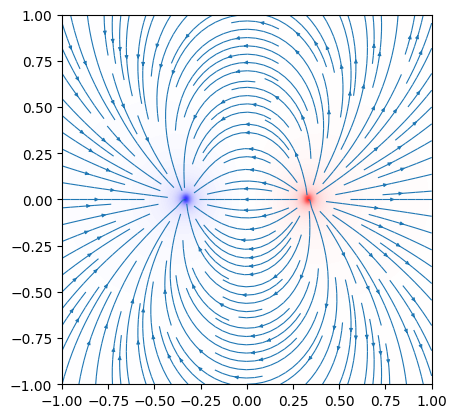

In [52]:
plt.imshow(
    color,
    extent=[-1, 1, -1, 1],
    cmap='bwr',
    interpolation='bicubic',
)
plt.streamplot(X, Y, U, V, density=1.5, arrowsize=0.5, linewidth=0.8)
plt.show()
